In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# To Scale our data
from sklearn.preprocessing import scale


In [4]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [5]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [6]:
country = pd.read_csv("country-data.csv")

In [7]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
country.shape

(167, 10)

In [9]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [11]:
country['exports'] = country['exports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100

In [12]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Visualisation


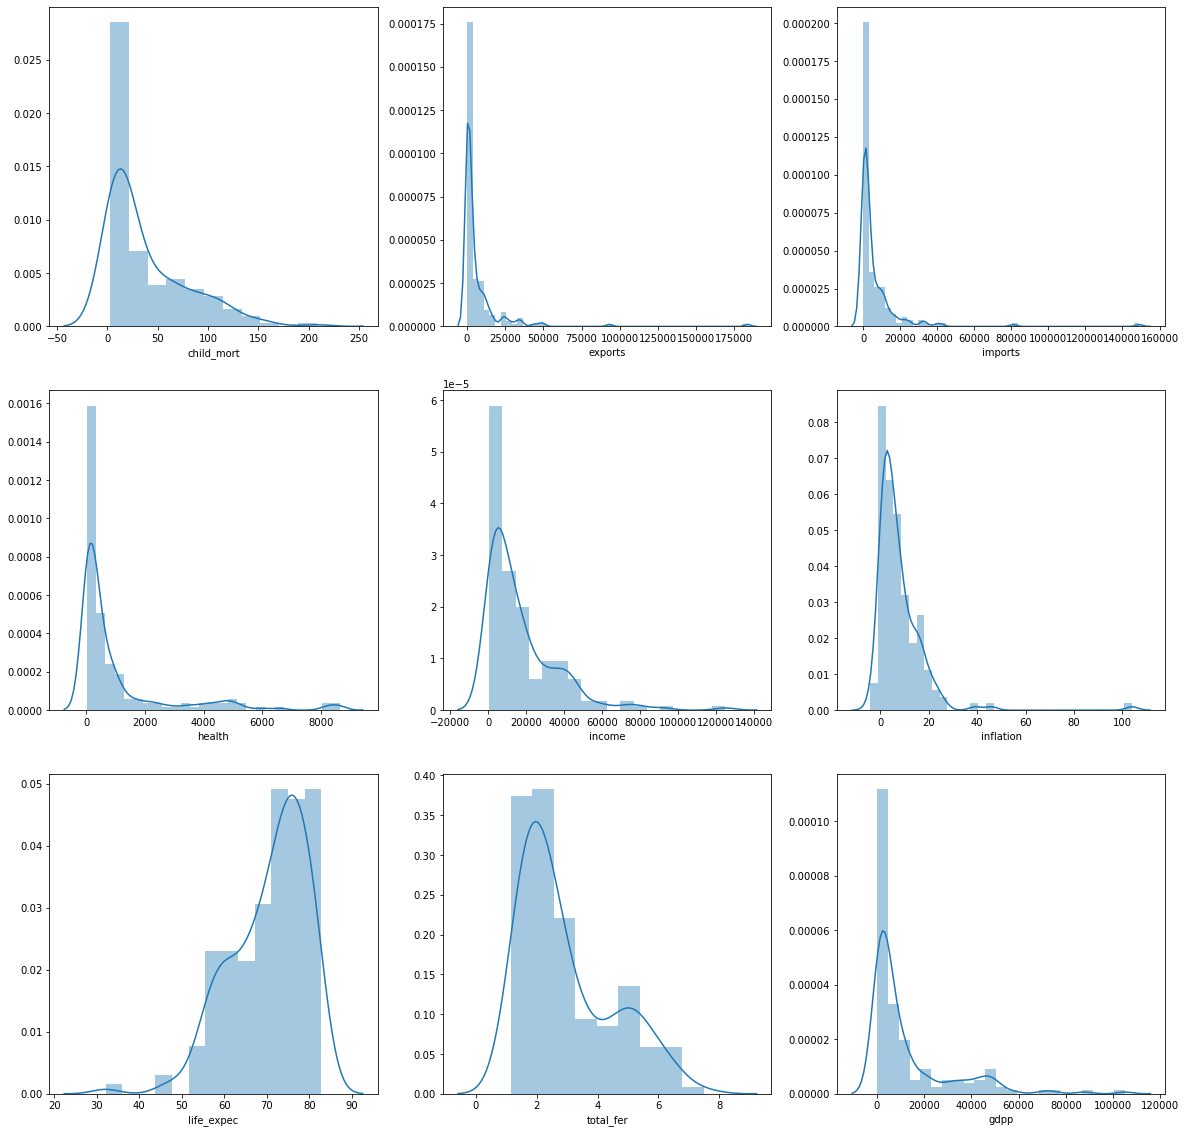

In [14]:
plt.figure(figsize= (20,20))
plt.subplot(331)
sns.distplot(country.child_mort)
plt.subplot(332)
sns.distplot(country.exports)
plt.subplot(333)
sns.distplot(country.imports)
plt.subplot(334)
sns.distplot(country.health)
plt.subplot(335)
sns.distplot(country.income)
plt.subplot(336)
sns.distplot(country.inflation)
plt.subplot(337)
sns.distplot(country.life_expec)
plt.subplot(338)
sns.distplot(country.total_fer)
plt.subplot(339)
sns.distplot(country.gdpp)
plt.show()

### Observations-
1. Most of the graphs are normally distributed thus reducing the chances of fifnding internal grouping.


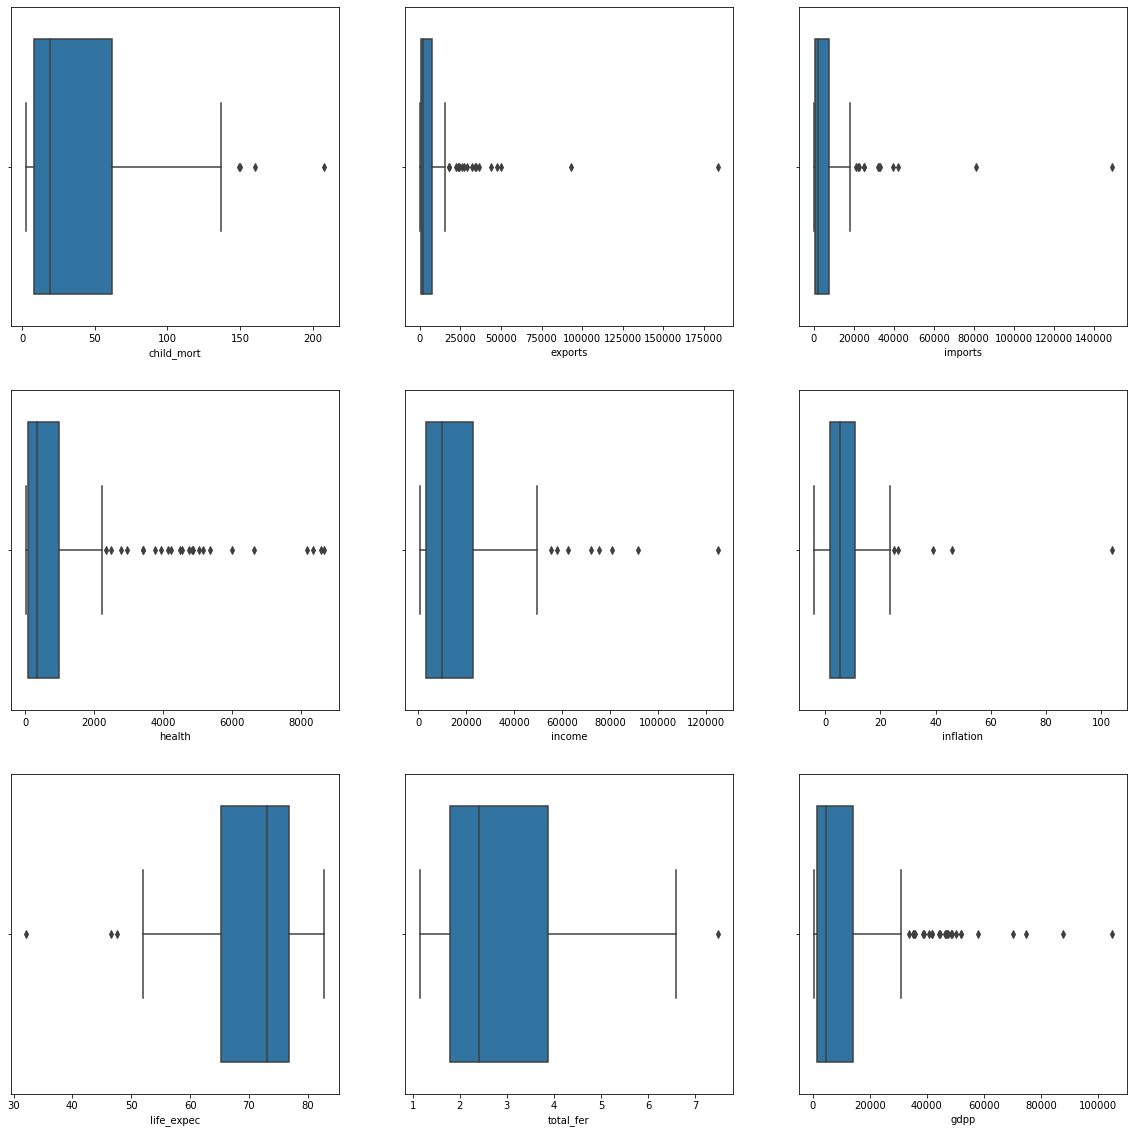

In [15]:
plt.figure(figsize= (20,20))
plt.subplot(331)
sns.boxplot(country.child_mort)
plt.subplot(332)
sns.boxplot(country.exports)
plt.subplot(333)
sns.boxplot(country.imports)
plt.subplot(334)
sns.boxplot(country.health)
plt.subplot(335)
sns.boxplot(country.income)
plt.subplot(336)
sns.boxplot(country.inflation)
plt.subplot(337)
sns.boxplot(country.life_expec)
plt.subplot(338)
sns.boxplot(country.total_fer)
plt.subplot(339)
sns.boxplot(country.gdpp)
plt.show()

### Observation -
1. Lots of outliers present in the data.But Since it is a small dataset we will go for soft capping to keep maximum of the data for our analysis.Only removing 1 percenatge of the outliers.

### Soft Capping the Outliers
1. Since the number of countries in the data are very less so therefore soft capping is a better option to go for.

In [16]:
q2 = country['exports'].quantile(0.99)
country['exports'][country['exports']>=q2] = q2

In [17]:
q2 = country['imports'].quantile(0.99)
country['imports'][country['imports']>=q2] = q2

In [18]:
q2 = country['health'].quantile(0.99)
country['health'][country['health']>=q2] = q2

In [19]:
q2 = country['income'].quantile(0.99)
country['income'][country['income']>=q2] = q2

In [20]:
q2 = country['gdpp'].quantile(0.99)
country['gdpp'][country['gdpp']>=q2] = q2

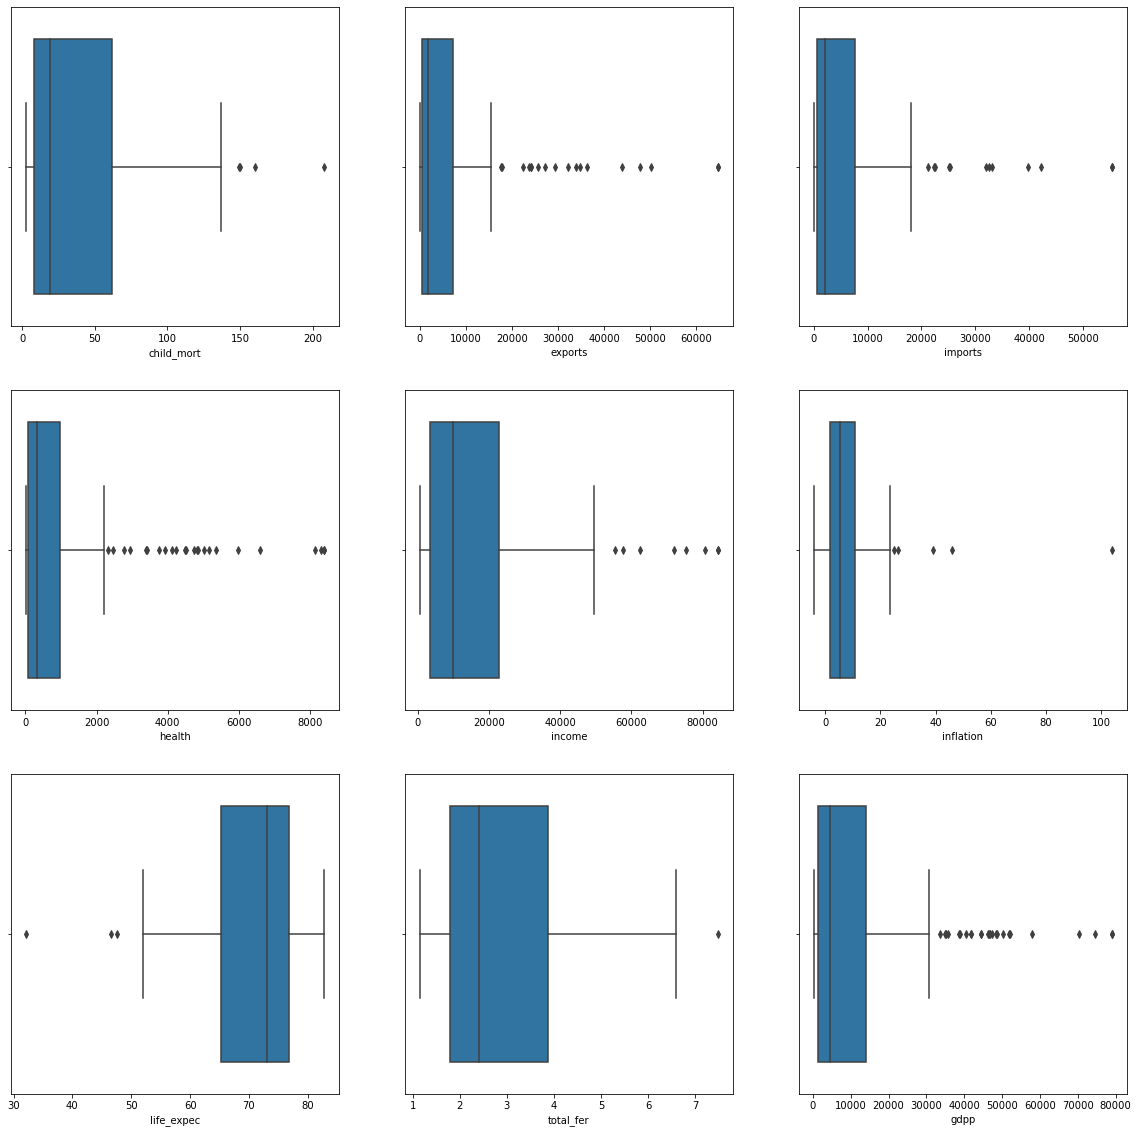

In [21]:
plt.figure(figsize= (20,20))
plt.subplot(331)
sns.boxplot(country.child_mort)
plt.subplot(332)
sns.boxplot(country.exports)
plt.subplot(333)
sns.boxplot(country.imports)
plt.subplot(334)
sns.boxplot(country.health)
plt.subplot(335)
sns.boxplot(country.income)
plt.subplot(336)
sns.boxplot(country.inflation)
plt.subplot(337)
sns.boxplot(country.life_expec)
plt.subplot(338)
sns.boxplot(country.total_fer)
plt.subplot(339)
sns.boxplot(country.gdpp)
plt.show()

## Hopkins Test

In [22]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [23]:
hopkins(country.drop('country', axis=1))

0.9039940245996906

## Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(country.drop('country', axis=1))

In [25]:
df1 = pd.DataFrame(df1)
df1.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [26]:
col = list(country.columns)
col.pop(0)

'country'

In [27]:
df1.columns = col

In [28]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


# Find the best value of k using SSD Elbow, Silhoutte Score

## Silhoutte Score

In [29]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil = pd.DataFrame(ss)

In [30]:
sil

,0,1
0,2,0.478584
1,3,0.422508
2,4,0.408354
3,5,0.414696
4,6,0.312257
5,7,0.297954
6,8,0.282147
7,9,0.312068
8,10,0.291876


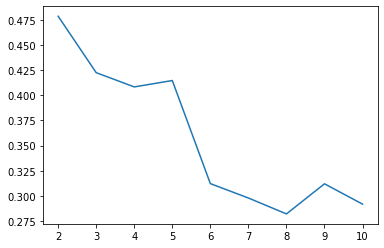

In [31]:
plt.plot(sil[0], sil[1]);

# Perform the kMeans analysis

## First iteration using 5 clusters

In [32]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=5, random_state=0)

In [33]:
# see the centroid values the algorithm generated for the final clusters
kmeans.cluster_centers_

array([[ 1.30629603, -0.49670069, -0.52616531, -0.53618229, -0.72539387,
         0.20589948, -1.27930022,  1.34238878, -0.62473275],
       [-0.80952463,  0.72253242,  1.1286181 ,  0.79312071,  1.23390029,
        -0.43794655,  1.01538672, -0.76584429,  1.23313668],
       [-0.4027129 , -0.34014022, -0.37126906, -0.32306416, -0.27705394,
        -0.01624701,  0.26426158, -0.4413361 , -0.38151875],
       [-0.84237107,  3.38505949,  2.51076791,  3.21669774,  2.37841226,
        -0.53228173,  1.1566476 , -0.78341088,  2.78938863],
       [ 2.28138502, -0.52268545, -0.52427246, -0.58201567, -0.65393736,
         9.12971806, -1.13412081,  1.91613337, -0.60000344]])

In [34]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 3, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       3, 1, 0, 4, 3, 1, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 3, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [35]:
country['labels'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [36]:
country['labels'].value_counts()

2    81
0    47
1    29
3     9
4     1
Name: labels, dtype: int64

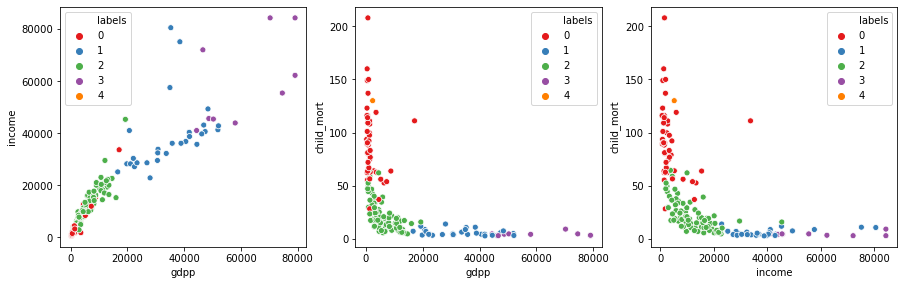

In [37]:
# Visualize using scatterplot for 5 clusters

plt.figure(figsize= (15,15))
plt.subplot(331)
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=country, palette='Set1')
plt.subplot(332)
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=country, palette='Set1')
plt.subplot(333)
sns.scatterplot(x='income', y='child_mort', hue= 'labels', data=country, palette='Set1')
plt.show()

### Second Iteration using 4 clusters

In [38]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=4, random_state=0)

In [39]:
# see the centroid values the algorithm generated for the final clusters
kmeans.cluster_centers_

array([[-0.40073015, -0.3477249 , -0.37432605, -0.32776224, -0.30044547,
        -0.02762071,  0.26115828, -0.44695248, -0.39099425],
       [-0.84237107,  3.38505949,  2.51076791,  3.21669774,  2.37841226,
        -0.53228173,  1.1566476 , -0.78341088,  2.78938863],
       [ 1.32661038, -0.49724204, -0.52612588, -0.53713716, -0.72390519,
         0.39181237, -1.27627565,  1.3543418 , -0.62421756],
       [-0.80125156,  0.70733581,  1.08677385,  0.76844277,  1.24591255,
        -0.39356005,  0.99862468, -0.74005033,  1.20458285]])

In [40]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [41]:
country['labels'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [42]:
country['labels'].value_counts()

0    80
2    48
3    30
1     9
Name: labels, dtype: int64

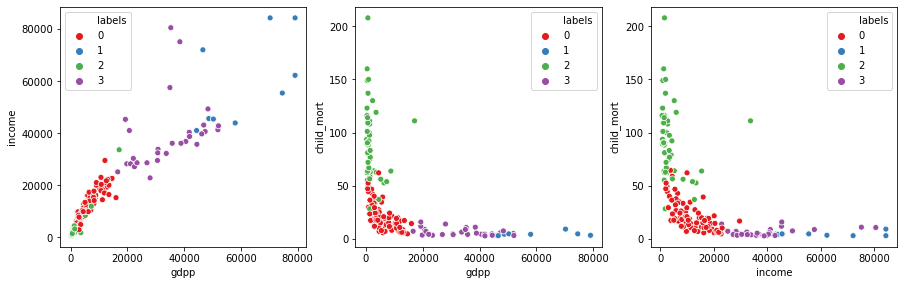

In [43]:
# Visualize using scatterplot for 4 clusters

plt.figure(figsize= (15,15))
plt.subplot(331)
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=country, palette='Set1')
plt.subplot(332)
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=country, palette='Set1')
plt.subplot(333)
sns.scatterplot(x='income', y='child_mort', hue= 'labels', data=country, palette='Set1')
plt.show()

### Third iteration using 3 clusters

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [45]:
# see the centroid values the algorithm generated for the final clusters
kmeans.cluster_centers_

array([[ 1.32661038, -0.49724204, -0.52612588, -0.53713716, -0.72390519,
         0.39181237, -1.27627565,  1.3543418 , -0.62421756],
       [-0.82514582,  1.74867521,  1.85335572,  1.7215187 ,  1.79855215,
        -0.44230208,  1.11738206, -0.77703072,  1.99793841],
       [-0.44998219, -0.25376753, -0.26941915, -0.22498284, -0.15014629,
        -0.0746178 ,  0.33795561, -0.47857149, -0.26067276]])

In [46]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [47]:
country['labels'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [48]:
country['labels'].value_counts()

2    92
0    48
1    27
Name: labels, dtype: int64

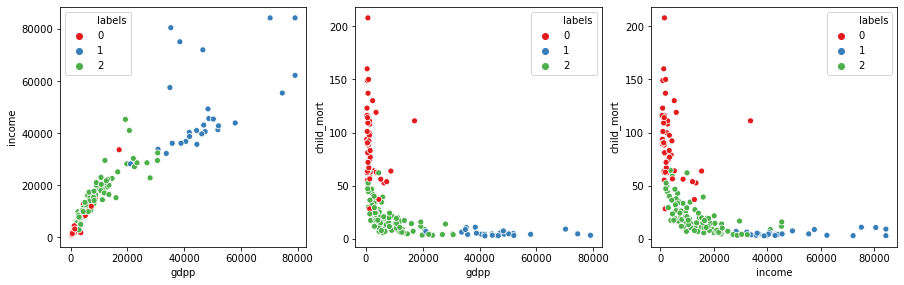

In [49]:
# Visualize using scatterplot for 3 clusters

plt.figure(figsize= (15,15))
plt.subplot(331)
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=country, palette='Set1')
plt.subplot(332)
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=country, palette='Set1')
plt.subplot(333)
sns.scatterplot(x='income', y='child_mort', hue= 'labels', data=country, palette='Set1')
plt.show()

### Observing all the 3 iterations we come to the conclusion that 3 clusters gives us the best fit for our analysis.So we will use it for our Cluster Profiling and for the final results.

# Perform Cluster profiling:

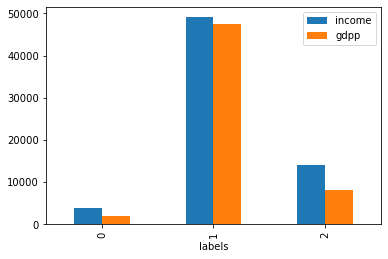

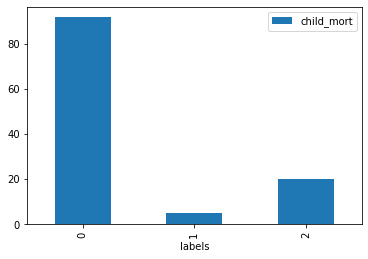

In [50]:
country[['income','gdpp','labels']].groupby('labels').mean().plot(kind = 'bar')
country[['child_mort','labels']].groupby('labels').mean().plot(kind = 'bar')
plt.show()

### Observation 
- It is observed that the 0'th cluster has the best fit which we are looking for which is countries with low income and low gdp and high mortality rate so we go ahead with the above mentioned cluster.

In [51]:
c1 = country[country['labels']==0]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231.0,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446.0,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897.0,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769.0,0


In [52]:
c1['labels'].value_counts()

0    48
Name: labels, dtype: int64

In [53]:
c1.sort_values(by=['child_mort','income','gdpp'], ascending= [False,True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.59,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.55,708.0,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150.0,104.00,60.5,5.84,2330.0,0
112,Niger,123.0,77.256,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.81,57.9,5.87,575.0,0


### Final Observation --
- From the above performed analysis we come to conclusion that the above mentioned countries are the one which are in need of monetary funds.

# Hierarchial Clustering: Single linkage, Complete Linkage


In [54]:
df1.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


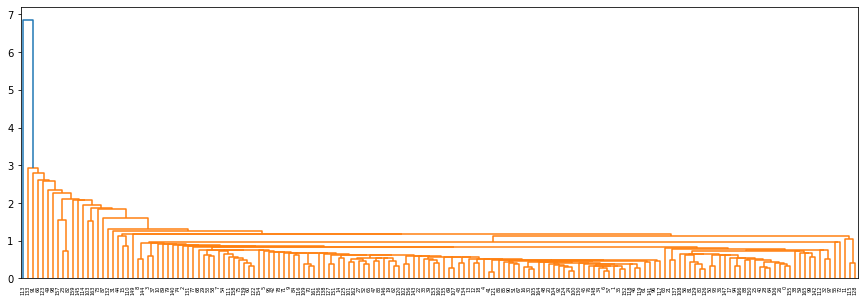

In [55]:
# single linkage
plt.figure(figsize= (15,5))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

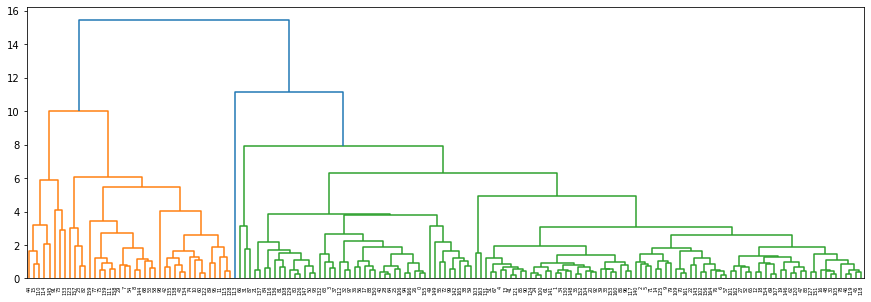

In [56]:
# complete linkage
plt.figure(figsize= (15,5))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [57]:
cluster_labels = cut_tree(mergings, n_clusters=8).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 4, 1, 0, 0, 1, 0, 2, 1, 5, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       5, 1, 2, 1, 1, 1, 0, 6, 2, 2, 1, 2, 1, 1, 0, 0, 4, 1, 0, 1, 1, 5,
       0, 2, 1, 6, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       3, 2, 0, 7, 3, 2, 0, 1, 1, 1, 1, 1, 2, 4, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 6, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 4, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [58]:
df1['cluster_labels'] = cluster_labels
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,1
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,1
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,1


In [59]:
df1['cluster_labels'].value_counts()

1    78
0    44
2    29
3     5
4     4
6     3
5     3
7     1
Name: cluster_labels, dtype: int64

In [60]:
df1['country'] = country['country']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0,Afghanistan
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,1,Albania
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,1,Algeria
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0,Angola
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,1,Antigua and Barbuda


In [61]:
df1 = df1[['country'] +[col for col in df1.columns if col!= 'country']]

In [62]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
1,Albania,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,1
2,Algeria,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434,1
3,Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
4,Antigua and Barbuda,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042,1


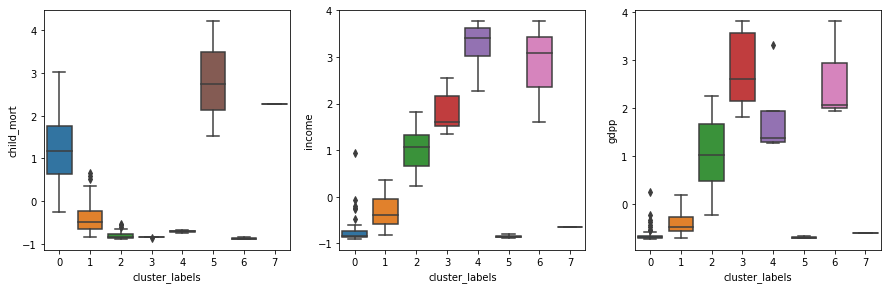

In [63]:
plt.figure(figsize= (15,15))
plt.subplot(331)
sns.boxplot(x='cluster_labels', y='child_mort', data=df1);
plt.subplot(332)
sns.boxplot(x='cluster_labels', y='income', data=df1);
plt.subplot(333)
sns.boxplot(x='cluster_labels', y='gdpp', data=df1);

In [64]:
c2 = df1[df1['cluster_labels']==0]
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259,0
3,Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
17,Benin,1.808842,-0.558630,-0.573029,-0.595156,-0.839938,-0.654410,-0.987502,1.598107,-0.690463,0
21,Botswana,0.353908,-0.331218,-0.295247,-0.278418,-0.198711,0.107996,-1.517586,-0.045030,-0.368676,0
25,Burkina Faso,1.933196,-0.564781,-0.568729,-0.607054,-0.861722,-0.092213,-1.427359,1.936010,-0.700994,0
26,Burundi,1.376093,-0.572671,-0.575427,-0.615532,-0.898922,0.428709,-1.449916,2.194407,-0.720789,0
28,Cameroon,1.734230,-0.548928,-0.552796,-0.587521,-0.793019,-0.557152,-1.495030,1.432468,-0.658699,0
32,Chad,2.778798,-0.545477,-0.567677,-0.583636,-0.833794,-0.132065,-1.585257,2.413050,-0.682464,0
36,Comoros,1.241791,-0.563332,-0.571010,-0.582851,-0.862839,-0.371177,-0.525087,1.193948,-0.689830,0
37,"Congo, Dem. Rep.",1.933196,-0.562419,-0.575638,-0.607537,-0.907580,1.235237,-1.472473,2.379922,-0.714862,0


In [65]:
c2['cluster_labels'].value_counts()

0    44
Name: cluster_labels, dtype: int64

In [66]:
c2.sort_values(by=['child_mort','income','gdpp'], ascending= [False,True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
132,Sierra Leone,3.027505,-0.568591,-0.561160,-0.610518,-0.873452,0.893648,-1.754433,1.492098,-0.711121,0
32,Chad,2.778798,-0.545477,-0.567677,-0.583636,-0.833794,-0.132065,-1.585257,2.413050,-0.682464,0
97,Mali,2.455480,-0.560298,-0.570687,-0.598718,-0.837145,-0.323734,-1.246905,2.386548,-0.693340,0
112,Niger,2.107290,-0.567693,-0.580378,-0.606983,-0.896129,-0.496426,-1.325854,3.009349,-0.714056,0
3,Angola,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950,0
37,"Congo, Dem. Rep.",1.933196,-0.562419,-0.575638,-0.607537,-0.907580,1.235237,-1.472473,2.379922,-0.714862,0
25,Burkina Faso,1.933196,-0.564781,-0.568729,-0.607054,-0.861722,-0.092213,-1.427359,1.936010,-0.700994,0
64,Guinea-Bissau,1.883454,-0.567320,-0.564394,-0.604675,-0.863956,-0.456574,-1.686762,1.392715,-0.702605,0
17,Benin,1.808842,-0.558630,-0.573029,-0.595156,-0.839938,-0.654410,-0.987502,1.598107,-0.690463,0
40,Cote d'Ivoire,1.808842,-0.520240,-0.554220,-0.568940,-0.791343,-0.226950,-1.607814,1.538477,-0.663878,0


### Final Observation -
- From the above performed analysis we come to conclusion that the above mentioned countries are the one which are in need of monetary funds.